In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

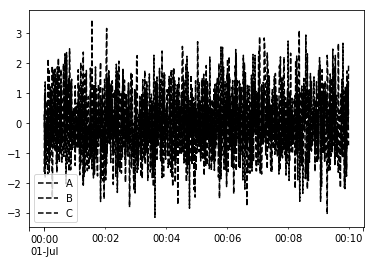

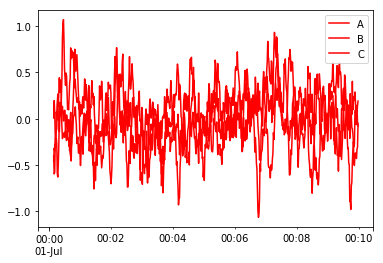

In [6]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(color='red')

In [7]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,-0.146124,-0.281639,-0.070476
2016-07-01 00:00:02,-0.787130,-0.542792,0.473671
2016-07-01 00:00:03,-0.678518,-0.392787,0.443691
2016-07-01 00:00:04,-0.690742,-0.647580,0.380843
2016-07-01 00:00:05,-0.624699,-0.508965,0.227988
2016-07-01 00:00:06,-0.343892,-0.449213,0.025254
2016-07-01 00:00:07,-0.414263,-0.465582,-0.309779
2016-07-01 00:00:08,-0.284722,-0.343910,0.127457
2016-07-01 00:00:09,-0.356127,-0.426690,-0.072573


In [8]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [9]:
df.head()

,A,B,C,D
2016-06-06,-1.199755,0.186704,-0.252877,1.237183
2016-06-07,1.078318,0.389155,0.673534,-0.789590
2016-06-08,-0.050171,0.052968,-0.963854,-1.360766
2016-06-09,-0.238460,0.444444,0.792753,0.877723
2016-06-10,1.929951,-1.306073,-0.844238,0.485912


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F96FFF6EF0>,
      dtype=object)

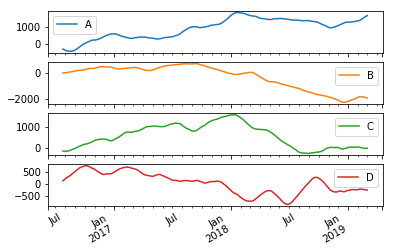

In [10]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [11]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.768534,0.443911,1.085926,0.416445


In [12]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.660596,0.381281,0.083890,0.842388
2016-06-08,-0.497600,0.463796,-0.125139,0.257201
2016-06-09,-0.475717,0.616165,-0.031465,0.184038
2016-06-10,-0.076597,0.446371,-0.144109,0.237323


In [13]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [14]:
# EWMA
# Why use EWMA?

In [15]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [16]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting